<a href="https://colab.research.google.com/github/ashish899999/diffusion/blob/main/text_to_imageipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

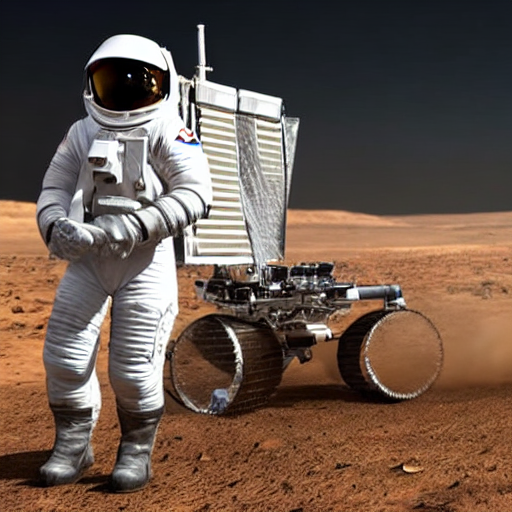

In [1]:
# Install required libraries
!pip install diffusers transformers accelerate scipy safetensors

import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the Stable Diffusion pipeline
# Using smaller model variant for faster generation
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,  # Use fp16 for faster inference
    variant="fp16",
    use_safetensors=True
).to(device)

# Optimize for performance
pipe.enable_attention_slicing()  # Reduces memory usage with minimal performance impact
# pipe.enable_xformers_memory_efficient_attention()  # Uncomment if xformers is installed

def generate_image(prompt, negative_prompt=None, num_images=1):
    """Generate images from text prompt"""
    with torch.autocast(device):  # Automatic mixed precision for faster inference
        images = pipe(
            prompt=prompt,
            negative_prompt=negative_prompt,
            num_images_per_prompt=num_images,
            num_inference_steps=25,  # Balance between quality and speed
            guidance_scale=7.5,       # Controls how closely the image follows the prompt
            width=512,                # Standard size for good results
            height=512
        ).images

    # Display images
    for img in images:
        display(img)

    return images

# Example usage
prompt = "a realistic photo of a astronaut riding a horse on mars, 4k, high resolution"
negative_prompt = "blurry, low quality, cartoon, anime, deformed"

generated_images = generate_image(prompt, negative_prompt)

# Optional: Save images
for i, img in enumerate(generated_images):
    img.save(f"generated_image_{i}.png")

  0%|          | 0/25 [00:00<?, ?it/s]

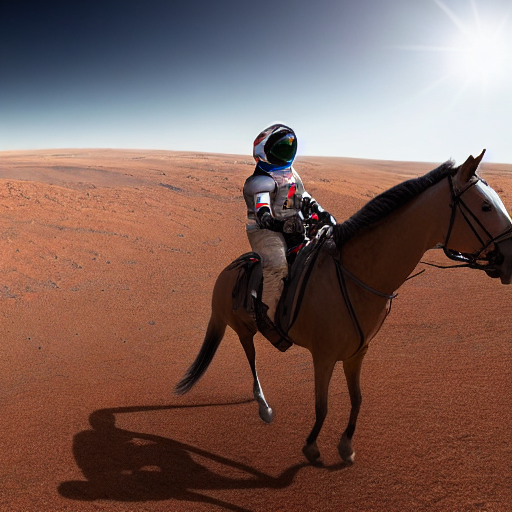

In [ ]:
# Example usage
prompt = "a realistic photo of a astronaut riding a horse on mars, 4k, high resolution"
negative_prompt = "blurry, low quality, cartoon, anime, deformed"

generated_images = generate_image(prompt, negative_prompt)

# Optional: Save images
for i, img in enumerate(generated_images):
    img.save(f"generated_image_{i}.png")

  0%|          | 0/25 [00:00<?, ?it/s]

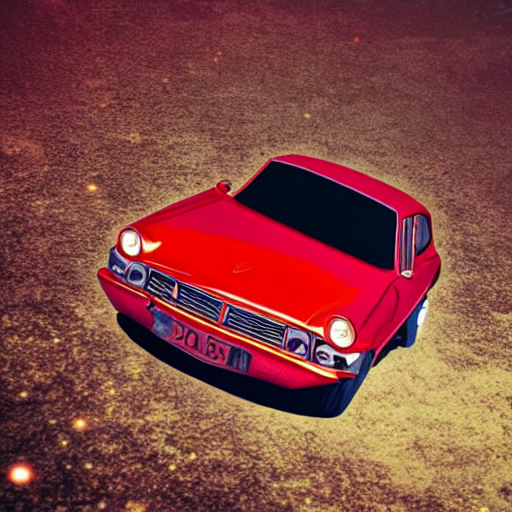

In [ ]:
# Example usage
prompt = " red car in space"
# negative_prompt = "blurry, low quality, cartoon, anime, deformed"

generated_images = generate_image(prompt)

# Optional: Save images
for i, img in enumerate(generated_images):
    img.save(f"generated_image_{i}.png")